<h1><center>CMSC320: Intro to Data Science Tutorial</center></h1>

<h1>Introduction:</h1>
<p1>This tutorial will go over steps to parse through two different data sets and analyze their correlation. In this particular tutorial the two data sets used are temperature and energy usage data. The tempurature dataset measures temperature anomalies in the United States from the 1950-1981 average for each year and month from 1768 to 2013. The energy data set lists energy usage in the United States by industry over time from 1973-2012.</p1>
<br><br>
<p1>Through out the tutorial various data science steps will be explained. These steps include Data Collection, Data Processing, Data analysis and visualization, machine learning and hypothesis testing, and Insight and policy. Through following these steps you will be able to make conclusions from this data in order to better understand the realtionship between temperature and energy usage.</p1>

<h1>Installing Libraries:</h1>
<p1>The first step is to install the libraries that are imported below. To do this we used a package manager called anaconda. On Linux you can install anaconda by using this command:
</p1>
<pre>
<code> bash Anaconda3-4.3.1-Linux-x86_64.sh </code>
</pre>
<p1>Once anaconda is installed you can then install the libraires used in this project. The main libraries used are Pandas, Numpy, matplotlib, scipy, and sklearn. The commands below will install these libraires:</p1>
<pre>
<code>
conda install -c conda-forge matplotlib=2.0.2
conda install -c conda-forge scikit-learn=0.18.1
conda install -c conda-forge pandas=0.20.1
conda install -c conda-forge scipy=0.19.0
conda install -c conda-forge numpy=1.12.1
</code>
</pre>
<p1>The next step is to import the proper classes and methods. This is done below.</p1>

In [183]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h1>Loading and Parsing Data:</h1>
<p1>Both datasets are downloaded into the project folder. They can accessed HERE(LINK TO GITHUB). The energy data is laoded first. It's raw data is an excel document. In order to load this into the porject call the pandas function read_excel. This will read the excel sheet into a pandas Dataframe. The next step is to name the column headers using the Dataframe.columns function. Print the first five rows with Dataframe.head(5)</p1>

In [184]:
#Read energy data in from excel spreadsheet
energy_data = pd.read_excel("Table_2.1_Energy_Consumption_by_Sector-2.xlsx", sheetname="Monthly Data", header=10, skiprows=[11])

#Change the column names, so they are shorter 
energy_data.columns = ["Month", "P.E. Residential", "T.E. Residential", "P.E. Commerical", "T.E. Commercial", 
                       "P.E. Industrial", "T.E. Industrial", "P.E. Transportation", "T.E. Transportation", 
                       "P.E. Electric", "Energy Consumption Balancing Item", "P.E. Total Consumption"]
energy_data.head(5)

,Month,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,P.E. Total Consumption
0,1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,7226.265
1,1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,6594.709
2,1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,6524.198
3,1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,5944.336
4,1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,6074.551


<p1>This next block of code does the same thing we did above but for the temperature dataset. This dataset is a text file. Therefore, the numpy method np.genfromtxt is used to load the data. This method returns an ndarray. In order to turn it into a dataframe with specific column headers we pass the ndarray and column names into pd.Dataframe().</p1>

In [185]:
#loads the climate data
climateTable = np.genfromtxt('tempData.txt', skip_header=2)

#dataframe representing the climate data
climate_data = pd.DataFrame(climateTable, columns=['Year', 'Month', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly', 'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty', 'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly', 'Twenty Year Uncertainty'])
climate_data.head(5)

,Year,Month,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768.0,9.0,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768.0,10.0,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768.0,11.0,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768.0,12.0,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769.0,1.0,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Data Processing:</h1>
<p1>The next step is to process the data. In this case we are combining the two datasets into one data frame for easier access and comparison of data.
</p1>
<br><br>
<p1>The first thing we must do to combine them is to create a similar column in each dataframe. This column will be composed of pandas datetime object. To create a datatime object we need a year month and day. The climate dataframe needs a day column. That is created in the first line of code. Then the datetime column is created by combing the existing Year Month and Day columns. The old columns are then dropped and the column headers are renamed.</p1>

In [186]:
#creates a new column in the format of year-month-day
climate_data['Day'] = np.ones(len(climate_data))
date = climate_data[['Year', 'Month', 'Day']].copy()
date = pd.to_datetime(date)
climate_data['Date'] = date

#drops the old date columns
climate_data = climate_data.drop('Year', axis=1)
climate_data = climate_data.drop('Month', axis=1)
climate_data = climate_data.drop('Day', axis=1)

#rearranges the columns
climate_data = climate_data[['Date', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly',
       'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty',
       'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly',
       'Twenty Year Uncertainty']]

climate_data.head(5)

,Date,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768-09-01,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768-10-01,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768-11-01,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768-12-01,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769-01-01,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


<p1>Now since the energy dataframe and climate dataframe have similar columns we can merge the two on those columns. Once merged we change the row indexing to represent represent dates. The merged dataframe is called climate_energy_data.</p1>

In [187]:
#merges the two dataframes on the date
climate_energy_data = pd.merge(energy_data, climate_data, left_on = 'Month', right_on = 'Date')

#Reindex the dataset, so indices are Datetime objects
climate_energy_data = climate_energy_data.set_index(["Month"])
climate_energy_data = climate_energy_data.drop('Date', axis=1)
climate_energy_data.index.name = None

climate_energy_data.head(5)

,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,...,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,...,-0.470,0.297,-0.266,0.054,-0.177,0.047,-0.101,0.024,-0.017,0.025
1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,...,0.130,0.246,-0.263,0.046,-0.189,0.041,-0.114,0.024,-0.012,0.024
1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,...,1.555,0.279,-0.244,0.049,-0.198,0.038,-0.123,0.025,-0.013,0.024
1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,...,-0.842,0.178,-0.124,0.046,-0.172,0.036,-0.115,0.026,-0.021,0.024
1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,...,-0.408,0.313,-0.012,0.050,-0.181,0.035,-0.108,0.026,-0.027,0.023


<h1>Data Analysis and Visualization:</h1>
<p1>Next, we will visualze the data using methods from matplotlibs library. First we will graph the energy usage dataset. We will create a graph for each industry showing how much energy they use based on years. Since the data is represented as energy usage by month we have created a method below called <code>getAvgs</code> which returns the average energy usage for a particular sector for each year from 1973 - 2014.</p1>

In [188]:
#Gets the monthly average in Energy Usage for a sector over time.
#If no sector is specified, it computes monthly averages for total energy consumption (across all sectors)
def getAvgs(df, sector = None):
    if( sector == None):
        sector = "P.E. Total Consumption"
    elif( sector == "Electric"):
         sector = "P.E. Electric"
    else:
        sector = "T.E. " + sector
    
    avgs = np.zeros( 2013 - 1973 + 1)
    for i in range(1973, 2014):
        temp = df[str(i)]

        sum = np.sum(temp[sector].values)
        avgs[i-1973] = sum / float(len(temp))
        
    return avgs

<p1>In addition, in order to make it easier to create multiple graphs we will create a method called <code>graph</code> which will create a graph given an array of x coordinate Y coordinates and a labels and titles. This method utilizes matplotlibs methods in order to display a scatter plot and a line of best fit.</p1>

In [192]:
#Graphs X and Y datapoints, and sets the title, xLabel, and yLabel
#t is the type of graph.  Currently, Line Graphs and Scatter Plots have been implemented.
def graph(X, Y, title, xLabel, yLabel, t="Line"):
    if( t == "Line"):
        plt.plot(X, Y, label = "Data Points")
    elif( t == "Scatter"):
        plt.scatter(X, Y, label="Data Points")
        
    plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), label="Best Fit Line")
    slope, intercept = np.polyfit(X, Y, 1)
    plt.legend(loc=0)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    print("Slope of the line of best fit is: %d" %slope)

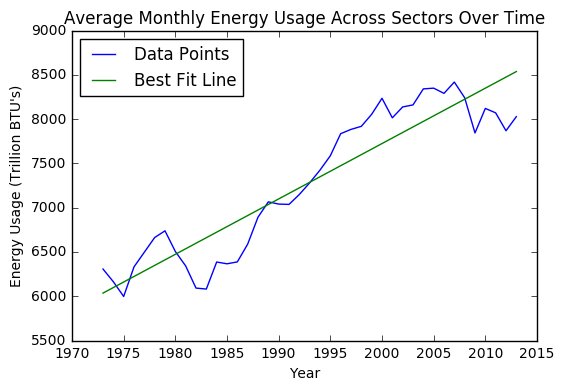

Slope of the line of best fit is: 62


In [193]:
#Plot average monthly energy usage per year over time
avgs = getAvgs(climate_energy_data)
years = np.arange(1973, 2014)

graph(years, avgs, "Average Monthly Energy Usage Across Sectors Over Time", "Year", "Energy Usage (Trillion BTU's)")

<p1>Above we plotted the overall average energy usage across all industries. In analyzing this graph and line or best fit it is clear that there is a positive relationship between energy usage and time. This means that as society has evolved the United States of America has been consistantly increasing its energy usage. Next we will create graphs for each industry by calling our <code>graph</code> function written above.</p1>

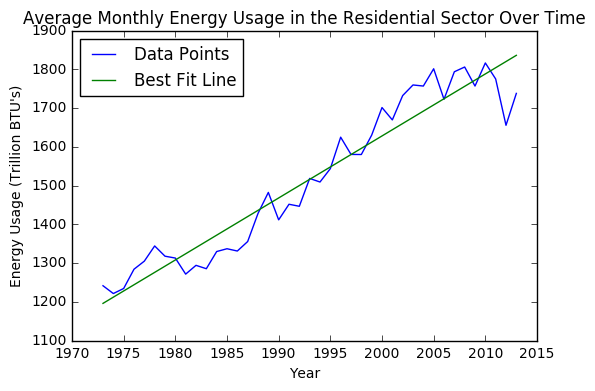

Slope of the line of best fit is: 16


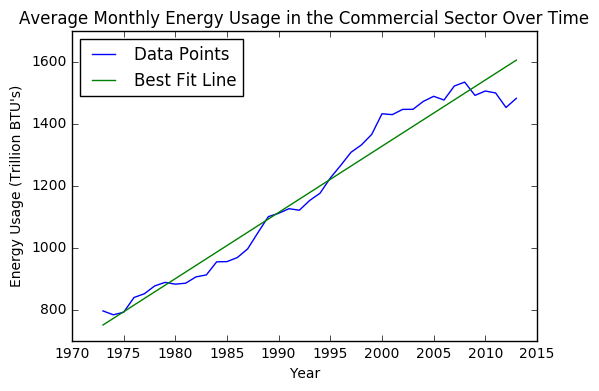

Slope of the line of best fit is: 21


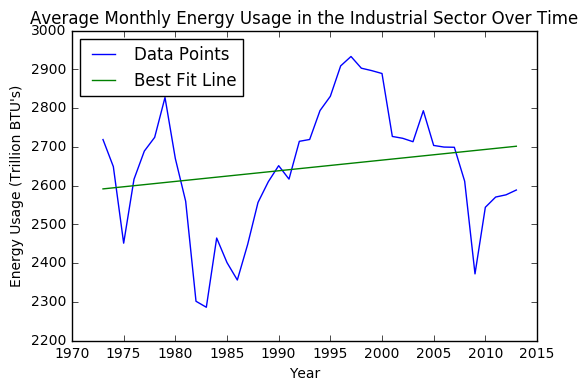

Slope of the line of best fit is: 2


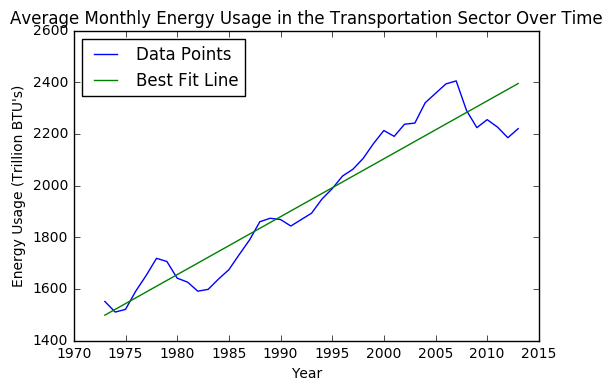

Slope of the line of best fit is: 22


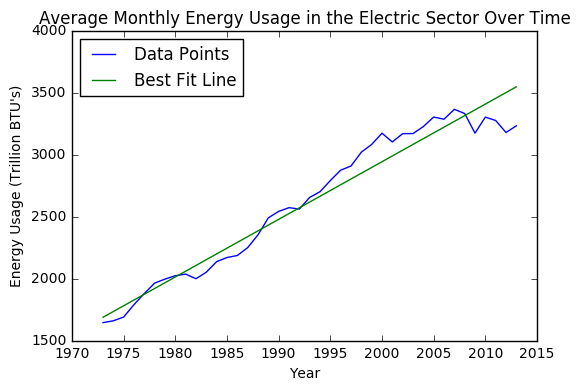

Slope of the line of best fit is: 46


In [194]:
#Compute monthly averages for each individual sector
sectors = ["Residential", "Commercial", "Industrial", "Transportation", "Electric"]

for s in sectors:
    avgs = getAvgs(climate_energy_data, s)
    graph(years, avgs, "Average Monthly Energy Usage in the " + s + " Sector Over Time", "Year", 
          "Energy Usage (Trillion BTU's)")

In [195]:
climate_data = climate_data.set_index(['Date'])
climate_data.index.name = None

In [196]:
def getAnomalies(start, end):
    end = end + 1
    anomalies = np.zeros(end - start)
    years = np.arange(start, end)

    for y in range(start, end):
        d = str(y) + '-06'
        anomalies[y - start] = climate_data[d]['Annual Anomaly']
    return anomalies, years

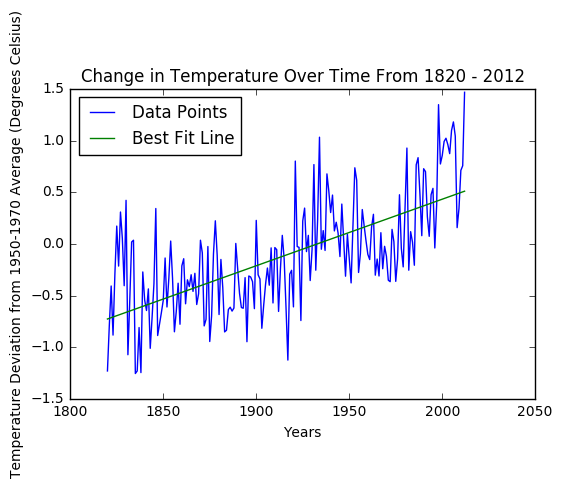

Slope of the line of best fit is: 0


In [197]:
anomalies, years = getAnomalies(1820, 2012)

graph(years, anomalies, "Change in Temperature Over Time From 1820 - 2012", "Years", 
      "Temperature Deviation from 1950-1970 Average (Degrees Celsius)")

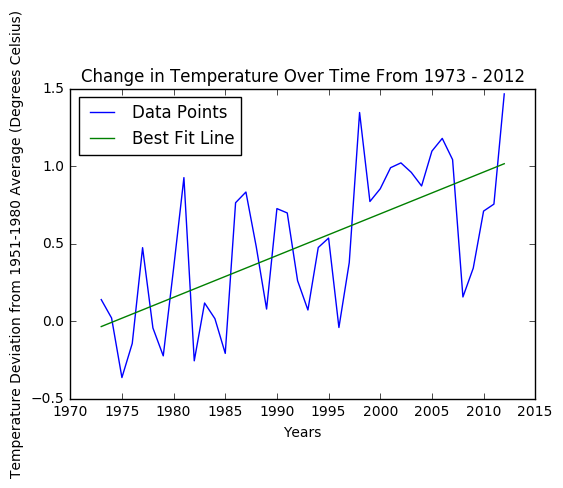

Slope of the line of best fit is: 0


In [198]:
anomalies, years = getAnomalies(1973, 2012)

graph(years, anomalies, "Change in Temperature Over Time From 1973 - 2012", "Years", 
      "Temperature Deviation from 1951-1980 Average (Degrees Celsius)")

In [199]:
stats.pearsonr(climate_energy_data['P.E. Total Consumption'], climate_energy_data['Monthly Anomaly'])

(0.30987579239266005, 2.4159757806075858e-12)

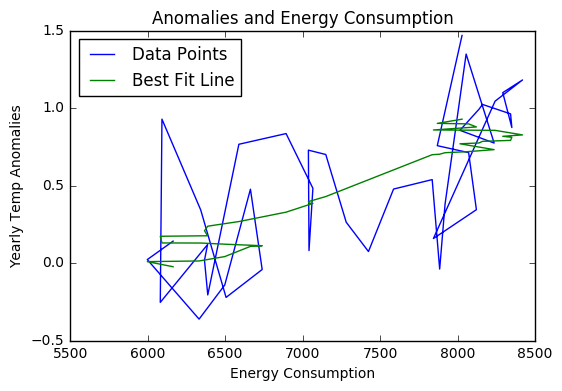

Slope of the line of best fit is: 0


In [200]:
avgs = getAvgs(climate_energy_data)
avgs = avgs[1:41]
anomalies, years = getAnomalies(1973, 2012)

graph(avgs, anomalies, "Anomalies and Energy Consumption", "Energy Consumption", 
      "Yearly Temp Anomalies")

^^^can still show this to show that there is not a perfect correlation

<h1>Machine Learning and Hypothesis Testing:</h1>

In [201]:
def trainTestSplit(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    return X_train, X_test, Y_train, Y_test

In [202]:
def linear_model(X, Y):

    #creates the linear regression model
    reg = lm.LinearRegression()
    reg.fit(X, Y)
    
    return reg

In [203]:
total_data = climate_energy_data.dropna()

X = np.c_[total_data.index.year, total_data.index.month, total_data.index.day]
Y = total_data['P.E. Total Consumption'].values

X_train, X_test, Y_train, Y_test = trainTestSplit(X, Y)

energy_reg = linear_model(X_train, Y_train)

In [204]:
Yhat = energy_reg.predict(X_test)

In [205]:
def getLoss(Ytrue, Yhat):
    return (Yhat - Ytrue)**2

In [206]:
def plotLoss(loss, avg_loss):
    N = len(loss)
    X = np.arange(N) + 1
    
    plt.scatter(X, loss)
    plt.plot(X, np.ones(N) * avg_loss, label="Average Loss", c="red", linewidth=2.0)
    plt.title("Squared Loss")
    plt.ylabel("Loss value")
    plt.legend(loc=0)
    plt.show()

Total Loss: 19099035.1904
Test accuracy: 258095.07014


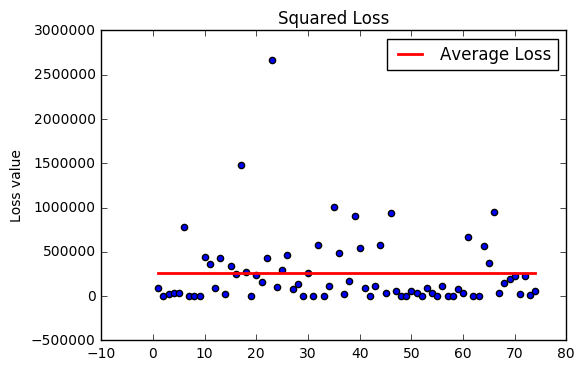

In [207]:
loss = getLoss(Y_test, Yhat)
totalLoss = np.sum(loss)

avg_loss = mean_squared_error(Y_test, Yhat)

print("Total Loss: %s" % totalLoss)
print("Test accuracy: %s" % avg_loss)
plotLoss(loss, avg_loss)

In [208]:
Y = total_data['Monthly Anomaly'].values
X_test, X_train, Y_test, Y_train = trainTestSplit(X, Y)

temp_reg = linear_model(X_train, Y_train)

In [209]:
Yhat = temp_reg.predict(X_test)

Total Loss: 268.964826292
Test accuracy: 0.911745173873


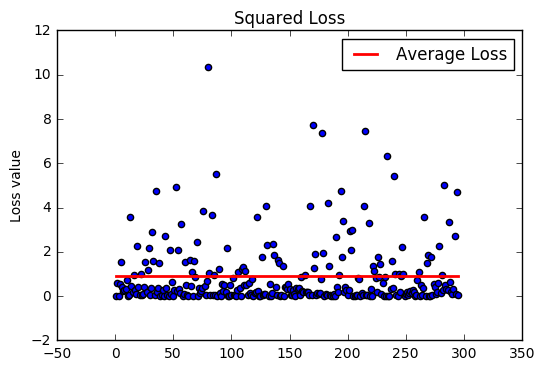

In [210]:
loss = getLoss(Y_test, Yhat)
totalLoss = np.sum(loss)

avg_loss = mean_squared_error(Y_test, Yhat)

print("Total Loss: %s" % totalLoss)
print("Test accuracy: %s" % avg_loss)
plotLoss(loss, avg_loss)

<h1>Insight and Policy:</h1>